In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def read_video(path:str) -> list:
    video_cap = cv2.VideoCapture(path)

    if not video_cap.isOpened():
        raise ValueError("Could not open video file")

    frames = list()
    while True:
        ret, frame = video_cap.read()
        if not ret:
            break 
        frames.append(frame)
    return frames

def crop_center(frame, margin: float = 0.05) -> np.ndarray:
    height, width, _ = frame.shape 

    x_center = height  // 2
    y_center = width // 2

    x_margin = int(height * margin)
    y_margin = int(width * margin)

    cropped_frame = frame[
        x_center - x_margin: x_center + x_margin, 
        y_center - y_margin : y_center + y_margin]

    return cropped_frame

def remove_OSD(frame) -> np.ndarray:
    blur = cv2.blur(frame, (5, 5))
    return blur
    

In [20]:
video_path = '../assets/test_video.mp4'
video = read_video(video_path)

In [24]:
video[0].shape, crop_center(video[0]).shape

((1080, 1920, 3), (108, 192, 3))

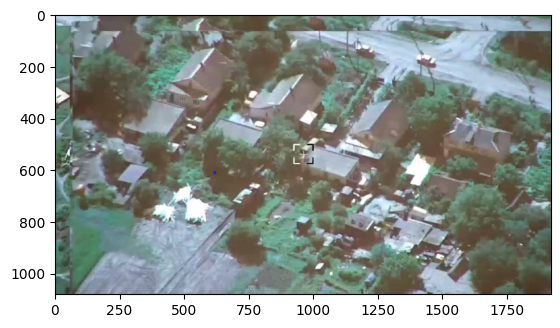

In [7]:
plt.imshow(video[0])

In [30]:
cropped_img = crop_center(video[0])

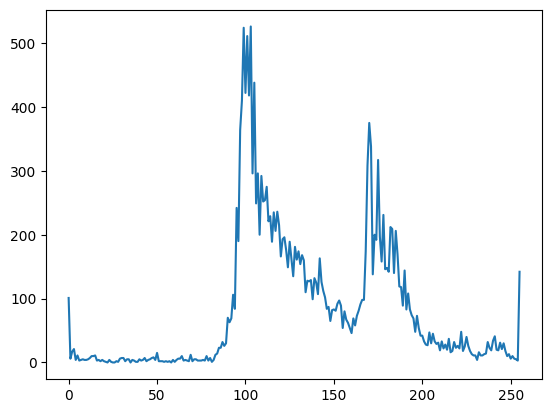

In [33]:

# find frequency of pixels in range 0-255
histr = cv2.calcHist([cropped_img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

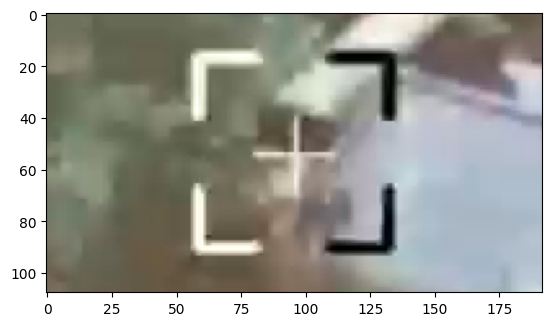

In [25]:
plt.imshow(cropped_img)

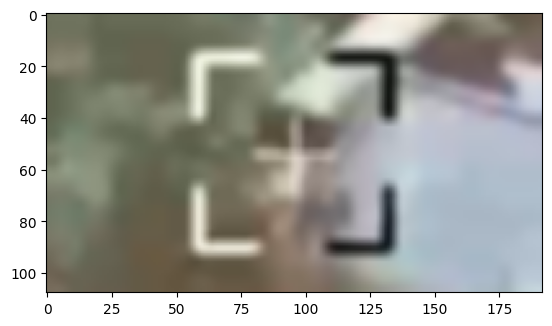

In [29]:
plt.imshow(remove_OSD(crop_center(video[0])))